In [1]:
%pylab inline
import h5py
import pandas as pd
import astropy.units as u
from astropy.table import Table
from astropy import coordinates as coords
style.use('notebook.mplstyle')
import gwb

Populating the interactive namespace from numpy and matplotlib


In [2]:
tgas = gwb.TGASData("../data/stacked_tgas.fits")

In [3]:
f = h5py.File("../output/23560/snr8_r10_dv10_vscatter0-lratio.h5") 
idx = Table.read("../output/23560/snr8_r10_dv10.fits")

tInitialSample = Table()
tInitialSample['star1'] = idx['star1']
tInitialSample['star2'] = idx['star2']
tInitialSample['lnH1'] = f['lnH1'].value
tInitialSample['lnH2'] = f['lnH2'].value
tInitialSample['RA1'] = tgas.ra.value[tInitialSample['star1']]
tInitialSample['DEC1'] = tgas.dec.value[tInitialSample['star1']]

In [4]:
dfInitialSample = tInitialSample.to_pandas()

In [5]:
dfInitialSample['lnratio'] = dfInitialSample['lnH1'] - dfInitialSample['lnH2']

In [6]:
dfstar = pd.read_csv("../db/table_star_new.csv")

In [7]:
g10 = dfstar.loc[dfstar.group_id == 10]
print(len(g10))

29


In [8]:
box = dfInitialSample.loc[
    (dfInitialSample.RA1>g10.tgas_ra.min()) & (dfInitialSample.RA1<g10.tgas_ra.max())
    & (dfInitialSample.DEC1>g10.tgas_dec.min()) & (dfInitialSample.DEC1<g10.tgas_dec.max())
]

In [9]:
print(len(box))

1045


In [10]:
import networkx as nx

In [12]:
masterg = nx.Graph()
masterg.add_weighted_edges_from(dfInitialSample[['star1', 'star2', 'lnratio']].values)

In [44]:
cmpairs = dfInitialSample.loc[dfInitialSample.lnratio>4]
print(len(cmpairs))
g = nx.from_edgelist(cmpairs[['star1', 'star2']].values)
print(len(nx.node_connected_component(g, 366159)))

51565
42


In [91]:
len(subg_g10)

71022

In [14]:
weights = [a[2]['weight'] for a in subg_g10.edges(data=True)]

In [15]:
style.use("fivethirtyeight")

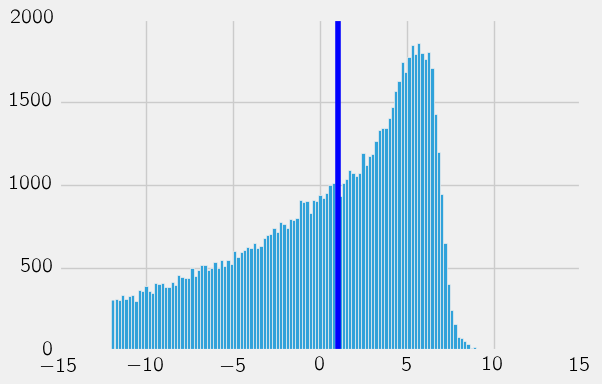

In [57]:
hist(weights, linspace(-12,12,128,));
axvline(1);

In [37]:
subg_g10 = masterg.subgraph(nx.node_connected_component(masterg, 363861))

In [74]:
gs = []
for cut in [6, 5, 4, 3, 2, 1, -2]:
    edges = filter(lambda x: x[2]['weight']>cut, masterg.edges_iter(data=True))
    gg = nx.Graph()
    gg.add_edges_from(edges)
    gg_g10 = nx.subgraph(gg, list(nx.node_connected_component(gg, 363861)))
    gs.append(gg_g10)
    print("cut {:1d} nedges = {:6d} nnodes = {:6d} g10 nnodes = {:3d}".format(
        cut, len(gg.edges()), len(gg), len(gg_g10)))

cut 6 nedges =  13058 nnodes =  10606 g10 nnodes =  29
cut 5 nedges =  30223 nnodes =  29587 g10 nnodes =  38
cut 4 nedges =  51565 nnodes =  58281 g10 nnodes =  42
cut 3 nedges =  71510 nnodes =  85481 g10 nnodes =  44
cut 2 nedges =  88122 nnodes = 106830 g10 nnodes =  45
cut 1 nedges = 102496 nnodes = 124183 g10 nnodes =  48
cut -2 nedges = 136174 nnodes = 159708 g10 nnodes =  55


In [97]:
import palettable

In [90]:
tgas_coordinates = tgas.get_coord()

/Users/semyeong/projects/gaia-wide-binaries/gwb/data.py:102: RuntimeWarning: invalid value encountered in sqrt
  tmp = self._data['parallax'] * (0.5 + 0.5*np.sqrt(1 - 16/snr**2))


In [91]:
tgas_gx,tgas_gy,tgas_gz=tgas_coordinates.transform_to(coords.Galactic).cartesian.xyz.value

/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/astropy/coordinates/angles.py:625: RuntimeWarning: invalid value encountered in less
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/astropy/coordinates/angles.py:513: RuntimeWarning: invalid value encountered in less
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/astropy/coordinates/angles.py:513: RuntimeWarning: invalid value encountered in greater
  if np.any(angles.value < lower) or np.any(angles.value > upper):
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/astropy/coordinates/angles.py:625: RuntimeWarning: invalid value encountered in greater_equal
  if np.any(self_angle < wrap_angle_floor) or np.any(self_angle >= wrap_angle):


In [101]:
norm = mpl.colors.Normalize(vmin=-2, vmax=8)
cmap = cm.colors.ListedColormap(palettable.colorbrewer.sequential.PuBu_5.mpl_colors)
m = cm.ScalarMappable(norm=norm, cmap=cmap)

/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indice

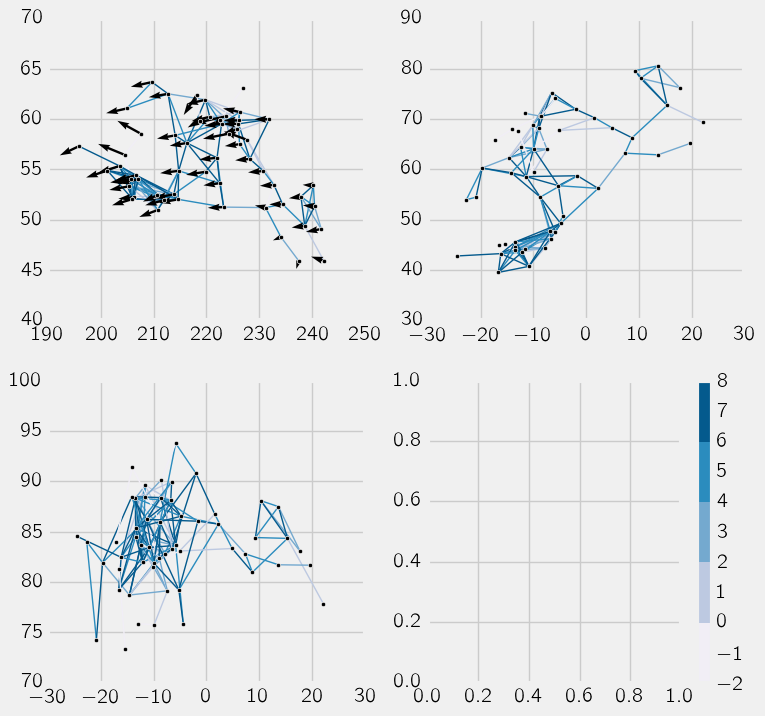

In [107]:
fig, ax = subplots(2,2,figsize=(8,8))
g = gs[-1]

pos = {node: (tgas.ra.value[node], tgas.dec.value[node]) for node in g.nodes()}
nx.draw_networkx(g, pos=pos, with_labels=False, node_size=10, node_color='k',
                 edge_color=[m.to_rgba(x[2]['weight']) for x in g.edges(data=True)],
                 ax=ax[0,0])
m.set_array(linspace(-2,10,64))
colorbar(m)

pos = {node: (tgas_gx[node], tgas_gy[node]) for node in g.nodes()}
nx.draw_networkx(g, pos=pos, with_labels=False, node_size=10, node_color='k',
                 edge_color=[m.to_rgba(x[2]['weight']) for x in g.edges(data=True)],
                 ax=ax[0,1])

pos = {node: (tgas_gx[node], tgas_gz[node]) for node in g.nodes()}
nx.draw_networkx(g, pos=pos, with_labels=False, node_size=10, node_color='k',
                 edge_color=[m.to_rgba(x[2]['weight']) for x in g.edges(data=True)],
                 ax=ax[1,0])

ax[0,0].quiver(tgas.ra.value[g.nodes()], tgas.dec.value[g.nodes()],
               tgas.pmra.value[g.nodes()], tgas.pmdec.value[g.nodes()], )

In [109]:
g10_target_tgasrow = gs[-3].nodes()

In [111]:
import mdmobs


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [117]:
!mkdir group10

In [118]:
namecol = ['10-{:d}'.format(int(idx)) for idx in g10_target_tgasrow]
g10_target_table = mdmobs.make_targetlist(namecol, tgas.ra.value[g10_target_tgasrow], tgas.dec.value[g10_target_tgasrow])
g10_target_table.write("group10/group10_targetlist.txt", format='ascii.no_header', delimiter='\t')

/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  from ipykernel import kernelapp as app


In [119]:
from astroplan.plots import plot_finder_image

In [120]:
night = mdmobs.Night(13)

/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


(0, 2)

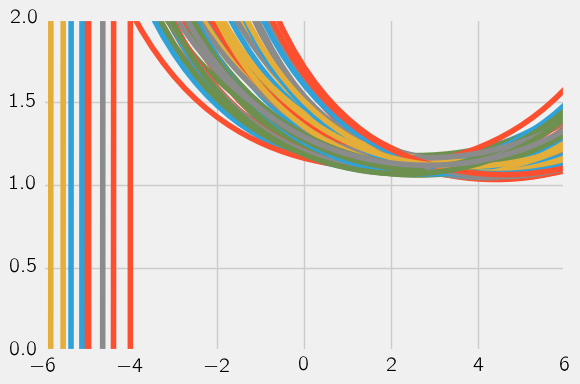

In [125]:
for i in g10_target_tgasrow:
    altaz = night.get_altaz(tgas.ra.value[i], tgas.dec.value[i])

    plot(night.offset, altaz.secz)
ylim(0, 2)

In [126]:
!mkdir group10/findingcharts

In [133]:
style.use("seaborn-talk")

In [138]:
for i in g10_target_tgasrow:
    c = coords.SkyCoord(tgas.ra.value[i], tgas.dec.value[i], unit='deg')
    fig = figure(figsize=(8,8))
    plot_finder_image(c, fov_radius=3*u.arcmin)
    ax = gca()
    ax.set_title("Group 10-{:d}\nG={:.1f} EXP={:.0f}".format(
        int(i), tgas.phot_g_mean_mag[i], float(mdmobs.mag2exp(tgas.phot_g_mean_mag[i]))))
    fig.savefig("group10/findingcharts/{:d}.png".format(int(i)))
    close(fig)

/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarn

/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


/Users/semyeong/anaconda2/envs/gwb/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [144]:
dfg10target = pd.DataFrame({'tgas_row':array(g10_target_tgasrow).astype('int')})

In [145]:
dfg10target['tgas_ra'] = tgas.ra.value[dfg10target.tgas_row]
dfg10target['tgas_dec'] = tgas.dec.value[dfg10target.tgas_row]
dfg10target['tgas_distance'] = tgas.get_distance().value[dfg10target.tgas_row]

/Users/semyeong/projects/gaia-wide-binaries/gwb/data.py:102: RuntimeWarning: invalid value encountered in sqrt
  tmp = self._data['parallax'] * (0.5 + 0.5*np.sqrt(1 - 16/snr**2))


In [147]:
dfstar.columns

Index(['Unnamed: 0', 'tgas_row', 'row_id', 'tgas_source_id', 'tgas_ra',
       'tgas_dec', 'tgas_parallax', 'tgas_distance', 'tgas_gmag', 'tmass_jmag',
       'rave_obs_id', 'rave_hrv', 'rave_ehrv', 'group_id', 'group_size', 'vra',
       'vdec', 'tgas_glon', 'tgas_glat', 'absvtan', 'pmra', 'pmdec', 'pmglon',
       'pmglat', 'gx', 'gy', 'gz', 'vglon', 'vglat'],
      dtype='object')

In [169]:
dfg10target['gx'] = tgas_gx[dfg10target.tgas_row]
dfg10target['gy'] = tgas_gy[dfg10target.tgas_row]
dfg10target['gz'] = tgas_gz[dfg10target.tgas_row]
dfg10target['tgas_glon'] = tgas.l[dfg10target.tgas_row]
dfg10target['tgas_glat'] = tgas.b[dfg10target.tgas_row]
dfg10target['tgas_gmag'] = tgas.phot_g_mean_mag[dfg10target.tgas_row]
dfg10target['hip'] = tgas.hip[dfg10target.tgas_row]
dfg10target.loc[dfg10target.hip==999999, 'hip'] = nan
dfg10target['tyc'] = tgas.tycho2_id[dfg10target.tgas_row]
dfg10target['source_id'] = tgas.source_id[dfg10target.tgas_row]

In [170]:
dfg10target['hip_tyc_id'] = ['HIP {:d}'.format(int(hip)) if not isnan(hip) else 'TYC {:s}'.format(tyc.decode())
                        for hip, tyc in zip(dfg10target.hip, dfg10target.tyc)]

In [149]:
import tap

In [208]:
import importlib
importlib.reload(tap)

<module 'tap' from '/Users/semyeong/projects/gaia-wide-binaries/notebooks/tap.py'>

In [209]:
gaia = tap.GaiaArchive()

In [210]:
gaia.login('soh', password='B9tCot4W9b|v')

In [211]:
gaia.session.cookies

<RequestsCookieJar[Cookie(version=0, name='JSESSIONID', value='98617D8881122F5A802F9FEB0F184886', port=None, port_specified=False, domain='gea.esac.esa.int', domain_specified=False, domain_initial_dot=False, path='/tap-server/', path_specified=True, secure=True, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)]>

In [187]:
Table.from_pandas(dfg10target[['source_id']]).write("g10.vot", format='votable', clobber=True)

TypeError: write_table_votable() got an unexpected keyword argument 'clobber'

In [193]:
gaia.upload_table("g10new", "g10.vot")

True

In [212]:
gaia.get_table_list().show_in_browser()

In [222]:
query="""
SELECT g10.source_id, tmass.j_m, tmass.h_m, tmass.ks_m
FROM g10
LEFT JOIN gaiadr1.tgas_source as tgas ON g10.source_id = tgas.source_id
LEFT JOIN gaiadr1.tmass_best_neighbour as tmass_match ON tmass_match.source_id = tgas.source_id
LEFT JOIN gaiadr1.tmass_original_valid as tmass ON tmass_match.tmass_oid = tmass.tmass_oid
"""
job=gaia.query(query)

In [223]:
gaia.session.cookies

<RequestsCookieJar[Cookie(version=0, name='JSESSIONID', value='98617D8881122F5A802F9FEB0F184886', port=None, port_specified=False, domain='gea.esac.esa.int', domain_specified=False, domain_initial_dot=False, path='/tap-server/', path_specified=True, secure=True, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)]>

In [224]:
job

source_id,j_m,h_m,ks_m
,Magnitude[mag],Magnitude[mag],Magnitude[mag]
int64,float32,float32,float32
1662855584317183744,10.187,9.6070004,9.4510002
1512773174838690176,9.033,8.6470003,8.5760002
1593570580647402880,8.7969999,8.4849997,8.4300003
1608103444306993664,6.3629999,6.4050002,6.3670001
1595101822387773952,9.5550003,9.1569996,9.0570002
1560784140339987200,9.0340004,8.5830002,8.4619999
1561660244948427136,8.5760002,8.2910004,8.2320004
1599791686156814464,9.6120005,9.1289997,9.0319996


In [225]:
dfg10target['tmass_j'] = job['j_m']

In [229]:
g0 = dfstar.loc[dfstar.group_id==0]

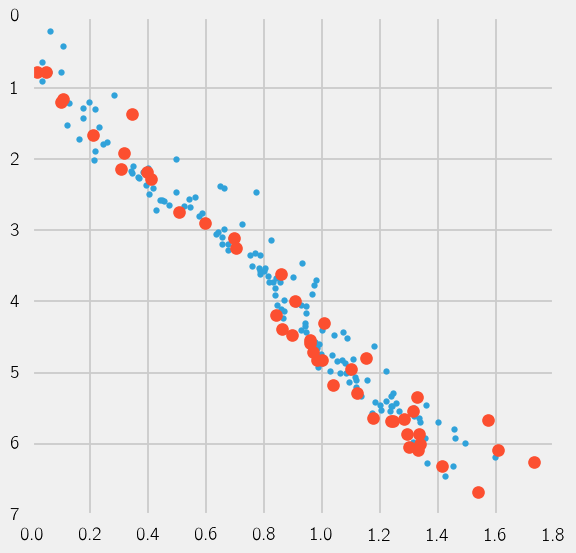

In [231]:
figure(figsize=(6,6))
plot(g0['tgas_gmag']-g0['tmass_jmag'],
     g0['tgas_gmag'] - 5*(log10(g0['tgas_distance'])-1), '.')
plot(dfg10target['tgas_gmag'] - dfg10target['tmass_j'],
     dfg10target['tgas_gmag'] - 5*(log10(dfg10target['tgas_distance'])-1), 'o')
gca().invert_yaxis()